# Nonlinear SVM Classification

Although  linear  SVM  classifiers  are  efficient  and  work  surprisingly  well  in  many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as **polynomial features**;  in  some  cases  this  can  result  in  a  linearly  separable  dataset.

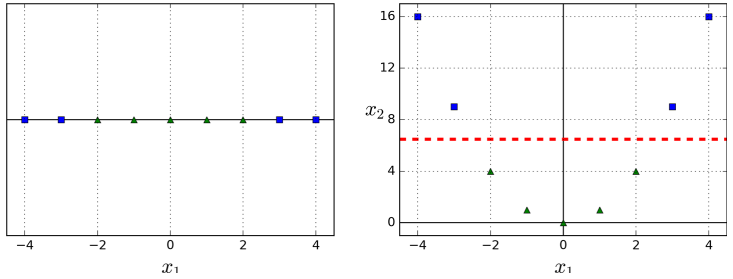

In [1]:
#x2=x^2. By adding this we are adding new polynomial features. 
#now linearly seperable. 


In [2]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

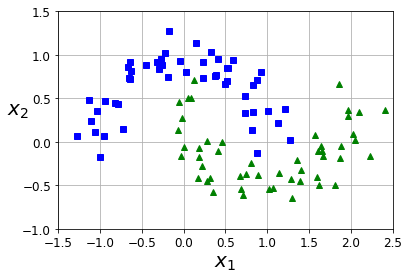

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

The code below createsa  Pipeline   containing
- a PolynomialFeatures   transformer 
- a  StandardScaler 
- a  LinearSVC

PolynomialFeatures in sklearn: if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. 

Don't do  polynomial degree more than 10 in the Dive server.

Degree 2: add 3 features  
Degree 3: add even more features. Do we really want to do a degree 10? 20?  
We want to make the degree a reasonably small number. Rarely/never above 5/10. 

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)), #specify highest degree of polynomial 
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

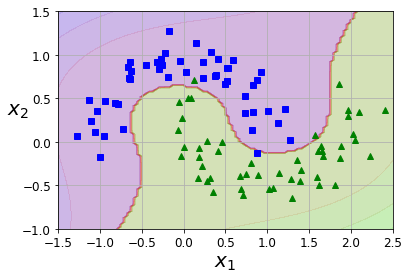

In [7]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

#even though high degree polynomial, this is linearly seperable in higher degree. 

## Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.

When  using  SVMs  you  can  apply  an  almost  miraculous  mathematical technique called the **kernel trick**.  It makes it possible to
get the same result as if you added many polynomial features, even with very high-
degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don’t actually add any features.

The code below trains an SVM classifier using a 3-degree polynomial kernel.

In [ ]:
#kernel trick gives same/very close to polynomial pipeline 
#however, don't have to add as many features, so run time may be quicker
#still want to keep degree fairly low

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #not linear SVM, real SVM here. 
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [10]:
poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=100, coef0=1, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y) #100 degree polynomial - usually don't do but for comparison

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=100,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

###  hyperparameter *degree*

#### 3-degree polynomial kernel vs. 100-degree polynomial kernel
If your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. 

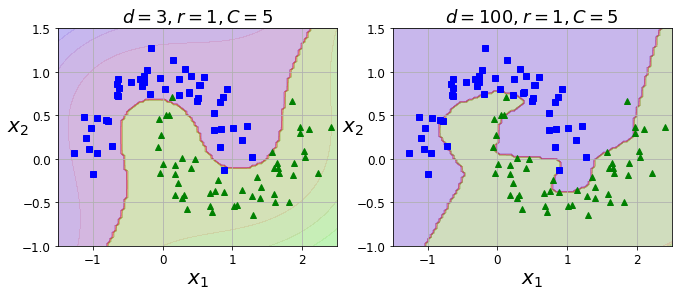

In [11]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=100, r=1, C=5$", fontsize=18)

plt.show()

Left Side: there are a handful of misclassifications. But overall pretty good.  
Right Side: 100 degree polynomial. Still some misclassifications. Overfitting.   
Even though overfitting, not better performance. 



### hyperparameter *coef0*
The  hyperparameter  coef0   controls  how  much  the  model  is  influenced  by  high-
degree polynomials versus low-degree polynomials.

How much weight can low degree polynomial features influence model 

In [14]:
poly_kernel_svm_clf_r1 = Pipeline([
        ("scaler", StandardScaler()), #coefficient 1 here
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5)) #C controls how wide margin. Small C- margin will be wider, allow more margin violations
    ]) 
poly_kernel_svm_clf_r1.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [15]:
poly_kernel_svm_clf_r100 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))#coefficient 100 here
    ])
poly_kernel_svm_clf_r100.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

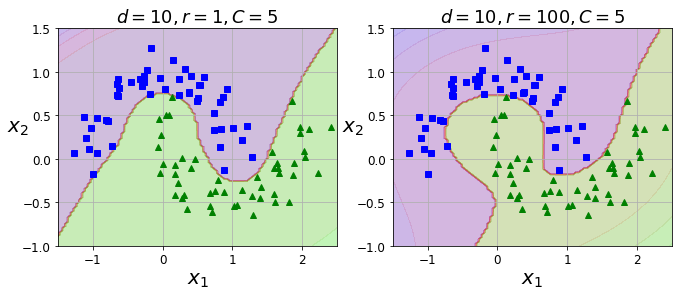

In [11]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf_r1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf_r100, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()


Coefficient 100: influenced more with higher degree polynomials. Make decision boundary weird  
    Blue area on bottom left doesn't make sense. Because influenced by high coefficient. 

## Grid Search
A common approach to find the right hyperparameter values is to use grid search (the lizard book has an example in Chapter 2).


Finding the right parameters (like what C or degree values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

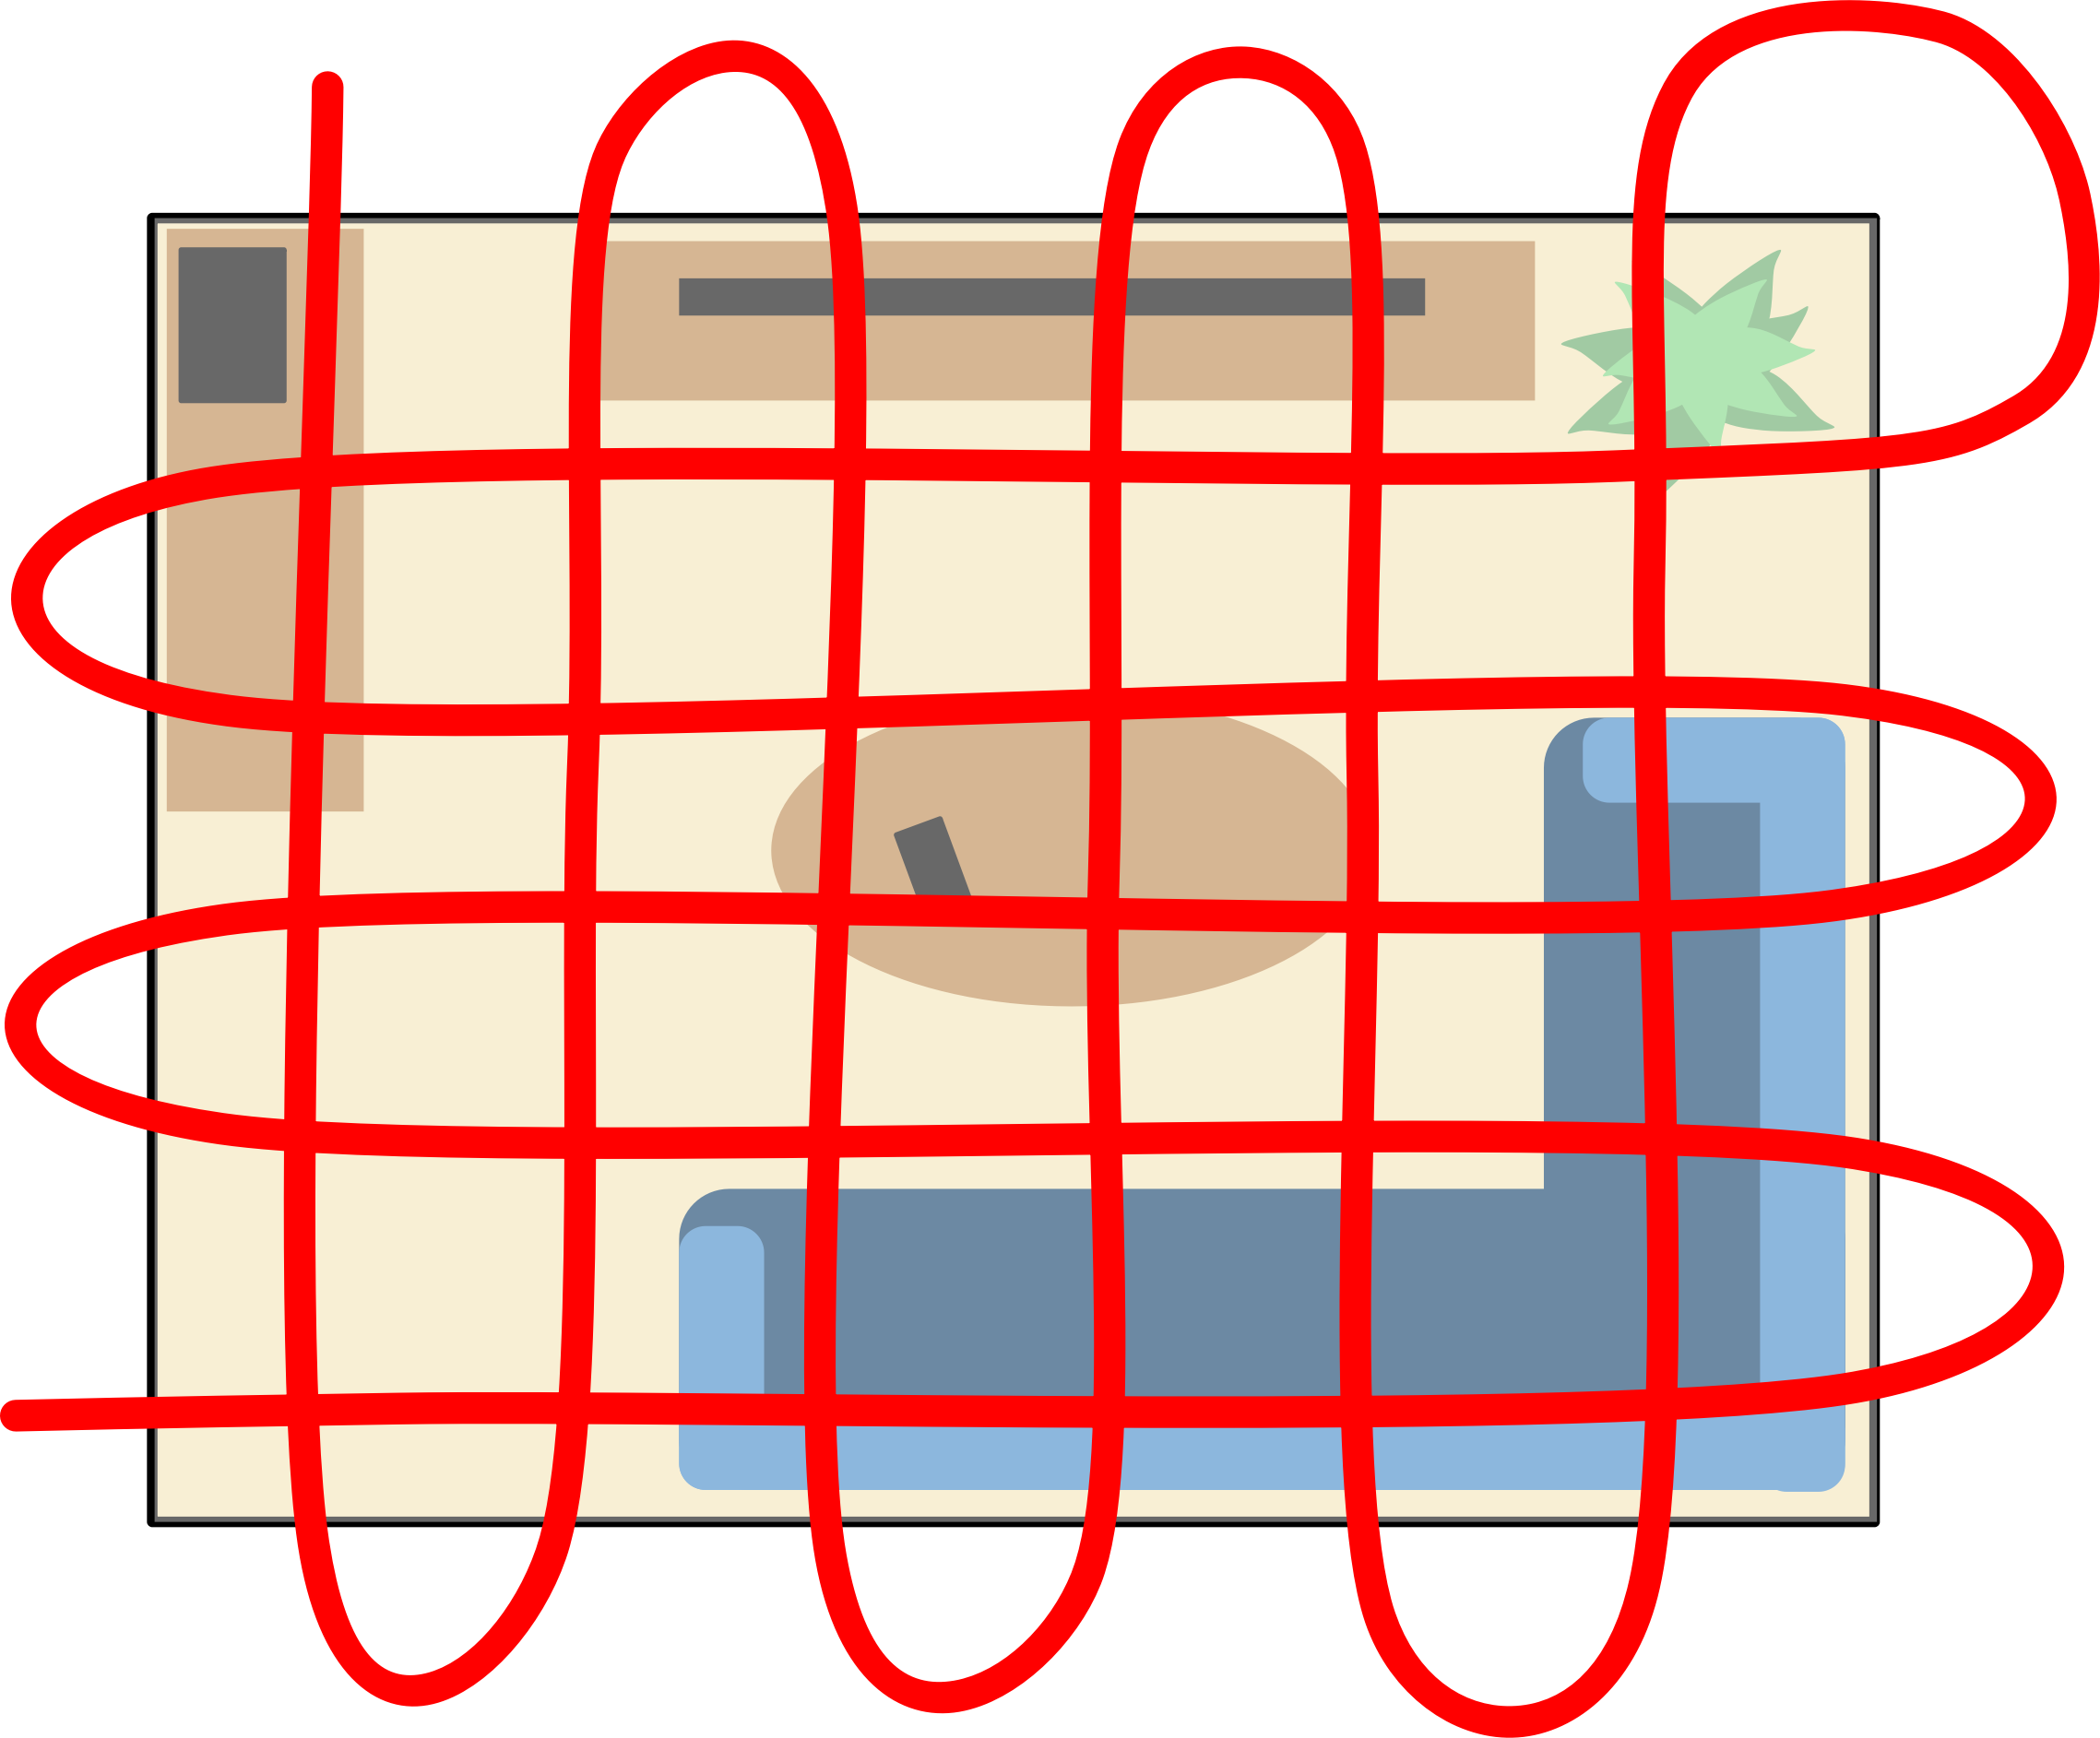

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [16]:
#Degree: rule of thumb not too big
#C: really depends on how the data looks "how beautiful"
#do Grid search to find the best parameters

In [17]:
from sklearn.svm import SVC

#define our search space. Created a dictionary. Key's C, degrees, coeficcient, kernel. 
#values for dictionary: list we want to try. 
#don't want to go too far. For C was reasonable. If I wanted to to .1,.2,.3... 100. Take a LONG time. 
    #have to shrink search space a little bit
param_grid = {'C': [0.1,1, 10,100], 'degree': [5,10,15,30],'coef0':[0.1,1, 10,100], 'kernel': ['poly']} 

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)#in gridsearch specify ML model

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [18]:
# May take awhile!
grid.fit(X,y) #tries all possible combination

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, coef0=0.1, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=0.1, degree=5, kernel=poly, score=0.735, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=0.1, degree=5, kernel=poly, score=0.676, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=0.1, degree=5, kernel=poly, score=0.719, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=0.1, degree=10, kernel=poly, score=0.706, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=0.1, degree=10, kernel=poly, score=0.676, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=0.1, degree=10, kernel=poly, score=0.719, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=15, kernel=poly ...................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, coef0=100, degree=5, kernel=poly, score=0.912, total=   0.1s
[CV] C=0.1, coef0=100, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=100, degree=5, kernel=poly, score=0.938, total=   0.1s
[CV] C=0.1, coef0=100, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=100, degree=10, kernel=poly, score=0.971, total=   0.0s
[CV] C=0.1, coef0=100, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=100, degree=10, kernel=poly, score=0.971, total=   0.0s
[CV] C=0.1, coef0=100, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=100, degree=10, kernel=poly, score=0.969, total=   0.0s
[CV] C=0.1, coef0=100, degree=15, kernel=poly ........................
[CV]  C=0.1, coef0=100, degree=15, kernel=poly, score=0.971, total=   0.0s
[CV] C=0.1, coef0=100, degree=15, kernel=poly ........................
[CV]  C=0.1, coef0=100, degree=15, kernel=poly, score=0.971, total=   0.0s
[CV] C=0.1, coef0=100, degree=15, kernel=poly .....

[CV]  C=10, coef0=100, degree=5, kernel=poly, score=0.912, total=   0.1s
[CV] C=10, coef0=100, degree=5, kernel=poly ..........................
[CV]  C=10, coef0=100, degree=5, kernel=poly, score=0.912, total=   0.1s
[CV] C=10, coef0=100, degree=5, kernel=poly ..........................
[CV]  C=10, coef0=100, degree=5, kernel=poly, score=0.938, total=   0.2s
[CV] C=10, coef0=100, degree=10, kernel=poly .........................
[CV]  C=10, coef0=100, degree=10, kernel=poly, score=0.971, total=   0.0s
[CV] C=10, coef0=100, degree=10, kernel=poly .........................
[CV]  C=10, coef0=100, degree=10, kernel=poly, score=0.971, total=   0.0s
[CV] C=10, coef0=100, degree=10, kernel=poly .........................
[CV]  C=10, coef0=100, degree=10, kernel=poly, score=0.969, total=   0.0s
[CV] C=10, coef0=100, degree=15, kernel=poly .........................
[CV]  C=10, coef0=100, degree=15, kernel=poly, score=0.971, total=   0.0s
[CV] C=10, coef0=100, degree=15, kernel=poly ..............

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    2.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.1, 1, 10, 100],
                         'degree': [5, 10, 15, 30], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [19]:
#best combination of parameters
#C: very small, so wide margin
#degree: lowest possible 
grid.best_params_

{'C': 0.1, 'coef0': 10, 'degree': 5, 'kernel': 'poly'}

## Discuss: should we stop the grid search here?


Would try more, two of our parameters selected were the lowest offered. 
1. Need to understand what those hyperparameters mean  
C is .1. That's small enough- do we want it to be any smaller?  
Should know that if do a very small C could have underfit model. This is small enough. 
Degree 5: want to try some smaller ones
2. Find your best estimator, then use that for predictions 

In [20]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

We did not do a train-test split, so let's predict all the samples again.

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
grid_predictions = grid.predict(X)
print(confusion_matrix(y,grid_predictions))
#Happy with result, so ok stopping here. 

[[49  1]
 [ 1 49]]


# Exercise

## Get the data

In [44]:
import pandas as pd
import numpy as np
# Get the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
target = cancer['target']
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This dataset is too large for our DIVE server. Let's call the sample function and only keep 15% of the dataset. The sampling should be done without replacement, with random seed 101.

In [45]:
# add the target as a column called 'target' to the df_feat
# We do this so that the target column will be sampled together with the features
df_feat['target'] = target

# sample 15% of the dataset #otherwise grid search take too long 
#may want to do something similar for projects
df_feat = df_feat.sample(frac=0.15, replace=False,random_state=101)
df_feat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
107,12.360,18.54,79.01,466.7,0.08477,0.06815,0.026430,0.019210,0.1602,0.06066,...,27.49,85.56,544.1,0.11840,0.19630,0.193700,0.08442,0.2983,0.07185,1
437,14.040,15.98,89.78,611.2,0.08458,0.05895,0.035340,0.029440,0.1714,0.05898,...,21.58,101.20,750.0,0.11950,0.12520,0.111700,0.07453,0.2725,0.07234,1
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.023770,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.176400,0.08235,0.3024,0.06949,1
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.059430,0.1861,0.06248,...,25.27,129.00,1233.0,0.13140,0.22360,0.280200,0.12160,0.2792,0.08158,0
319,12.430,17.00,78.60,477.3,0.07557,0.03454,0.013420,0.016990,0.1472,0.05561,...,20.21,81.76,515.9,0.08409,0.04712,0.022370,0.02832,0.1901,0.05932,1
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,...,16.93,94.17,661.1,0.11700,0.10720,0.037320,0.05802,0.2823,0.06794,1
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.041320,0.019240,0.1649,0.07633,...,19.62,64.48,284.4,0.17240,0.23640,0.245600,0.10500,0.2926,0.10170,1
202,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.352300,0.162000,0.2200,0.06229,...,32.68,177.00,1986.0,0.15360,0.41670,0.789200,0.27330,0.3198,0.08762,0
268,12.870,16.21,82.38,512.2,0.09425,0.06219,0.039000,0.016150,0.2010,0.05769,...,23.64,89.27,597.5,0.12560,0.18080,0.199200,0.05780,0.3604,0.07062,1
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.10750,0.3301,0.09080,1


In [46]:
# separate the features and the target labels again
target = df_feat['target']

df_feat=df_feat.drop(columns=['target'])

In [47]:
# do a train-test split, keep 30% of the samples as test set, with random seed 101

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, target, test_size=0.30, random_state=101)

In [33]:
# create a dictionary for the parameters to cover in the grid search:
# C: 0.1, 1, 10
# degree: 5, 10, 15
# coef0: 0.1, 1, 10
# kernel: poly
param_grid = {'C': [0.1,1, 10], 'degree': [5,10,15],'coef0':[0.1,1, 10], 'kernel': ['poly']} 

# Create a GridSearchCV object called grid
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [52]:
# Call the fit function to run the grid search
grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] C=0.1, coef0=0.1, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=0.1, degree=5, kernel=poly, score=0.850, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=0.1, degree=5, kernel=poly, score=0.700, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=5, kernel=poly .........................
[CV]  C=0.1, coef0=0.1, degree=5, kernel=poly, score=0.895, total=   0.1s
[CV] C=0.1, coef0=0.1, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=0.1, degree=10, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=0.1, degree=10, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=10, kernel=poly ........................
[CV]  C=0.1, coef0=0.1, degree=10, kernel=poly, score=0.579, total=   0.0s
[CV] C=0.1, coef0=0.1, degree=15, kernel=poly ....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, coef0=1, degree=5, kernel=poly, score=0.895, total=   0.1s
[CV] C=0.1, coef0=1, degree=10, kernel=poly ..........................
[CV]  C=0.1, coef0=1, degree=10, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, coef0=1, degree=10, kernel=poly ..........................
[CV]  C=0.1, coef0=1, degree=10, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, coef0=1, degree=10, kernel=poly ..........................
[CV]  C=0.1, coef0=1, degree=10, kernel=poly, score=0.579, total=   0.0s
[CV] C=0.1, coef0=1, degree=15, kernel=poly ..........................
[CV]  C=0.1, coef0=1, degree=15, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, coef0=1, degree=15, kernel=poly ..........................
[CV]  C=0.1, coef0=1, degree=15, kernel=poly, score=0.600, total=   0.0s
[CV] C=0.1, coef0=1, degree=15, kernel=poly ..........................
[CV]  C=0.1, coef0=1, degree=15, kernel=poly, score=0.579, total=   0.0s
[CV] C=0.1, coef0=10, degree=5, kernel=poly ....................

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.1, 1, 10],
                         'degree': [5, 10, 15], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [53]:
# show the best parameters 
grid.best_params_
#C is 1: in the middle so probably ok
#degree is five: smallest option, may want to try smaller
#coef (he got ten) probably ok

{'C': 0.1, 'coef0': 0.1, 'degree': 5, 'kernel': 'poly'}

In [54]:
# show the details of the best estimator
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
# use the grid to predict X_test and show the confusion matrix (compared with y_test)
from sklearn.metrics import classification_report,confusion_matrix
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[ 4  5]
 [ 0 17]]


In [56]:
# show the classification report
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.77      1.00      0.87        17

    accuracy                           0.81        26
   macro avg       0.89      0.72      0.74        26
weighted avg       0.85      0.81      0.78        26



### If we want to extend the grid search based on the first grid search, what parameter/range will you propose to search?

In [57]:
param_grid_new ={'C':[0.01, 0.1, 1], 'degree':[2,3,4,5], 'kernel':['poly']}

#Create a GridsearchCV with object called grid
grid= GridSearchCV(SVC(), param_grid_new, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV] ....... C=0.01, degree=2, kernel=poly, score=0.900, total=   0.0s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV] ....... C=0.01, degree=2, kernel=poly, score=0.700, total=   0.0s
[CV] C=0.01, degree=2, kernel=poly ...................................
[CV] ....... C=0.01, degree=2, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] ....... C=0.01, degree=3, kernel=poly, score=0.900, total=   0.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] ....... C=0.01, degree=3, kernel=poly, score=0.700, total=   0.0s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] ....... C=0.01, degree=3, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.01, degree=5, kernel=poly, score=0.895, total=   0.1s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.900, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.700, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=0.1, degree=3, kernel=poly, score=0.900, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=0.1, degree=3, kernel=poly, score=0.700, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=0.1, degree=3, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'degree': [2, 3, 4, 5],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
grid.best_params_
#find even better set of hyperparameters
#quite common 'Coarse grid search'- first round
#narrow second round in grid search space 

{'C': 0.01, 'degree': 2, 'kernel': 'poly'}

# To sum up
- Polynomial kernel
    - map/transform data to high dimensional space where it is easier to classify with a linear decision boundary
    - a non-linear function is learned by a linear learning machine in a high-dimensional feature space
- Gridsearch
    - can take long time if the dataset is large
    - do a coarse search to get some sense on how to optimize the model first
